<a href="https://colab.research.google.com/github/vkjadon/python/blob/main/scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving Engineering Equations, Analytical solution is hard → numerical solution is practical.

In [14]:
from scipy.optimize import fsolve

def equation(x):
    return x**3 - 4*x - 9

solution = fsolve(equation, 2)
print("Solution:", solution)


Solution: [2.70652795]


x0 → initial guess (engineering intuition!)

fsolve → Newton-like numerical solver

In [15]:
## Optimization (Design Problems)

Used in mechanical design, control tuning, economics

Objective function = cost / error / loss

Minimize power loss in a system

$P(x)=x^2+10 \times sin(x)$

minimize() can give a locally correct but globally wrong answer depending on the initial guess

In [17]:
import numpy as np

In [25]:
def power_loss(x):
    return x**2 + 10*np.sin(x)

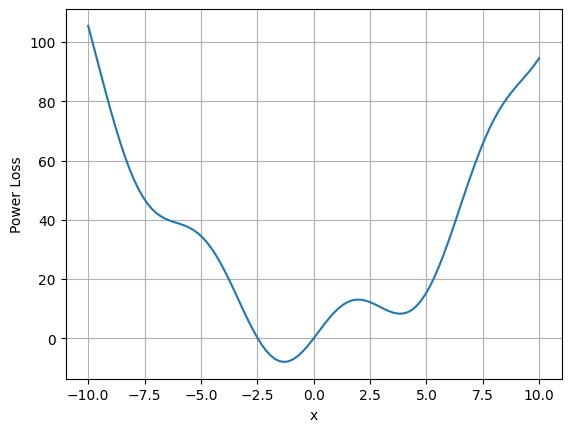

In [34]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

plt.plot(x, power_loss(x))
plt.xlabel("x")
plt.ylabel("Power Loss")
plt.grid()
plt.show()


The function is non-convex

Has multiple local minima

Uses gradient-based optimization by default

In [30]:
from scipy.optimize import minimize
result = minimize(power_loss, x0=9)
print(result.x)

[3.83746712]


## Solving Differential Equations (Core Engineering Skill)

First-order system (RC circuit / thermal system)

$\frac{dy}{dt}= - 2y $

In [18]:
from scipy.integrate import solve_ivp

def model(t, y):
    return -2*y

sol = solve_ivp(model, [0, 5], [1])

print(sol.t)
print(sol.y)


[0.         0.07580098 0.53982989 0.9778447  1.41762488 1.85765578
 2.29853678 2.74142403 3.18900887 3.64721566 4.12787286 4.65118739
 5.        ]
[[1.00000000e+00 8.59330265e-01 3.39954077e-01 1.41634832e-01
  5.88020563e-02 2.44004625e-02 1.01080684e-02 4.17064112e-03
  1.70480502e-03 6.82283272e-04 2.61139397e-04 9.18493878e-05
  4.57237894e-05]]
